<a href="https://colab.research.google.com/github/chamatt/Computer-Vision-Course/blob/master/07%20-%20Convolutional%20Neural%20Networks/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
import random

### Getting to know our data (MNIST Dataset)

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

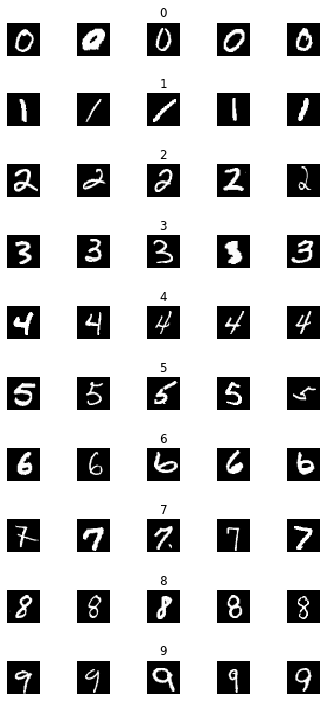

In [8]:
num_of_samples=[]
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


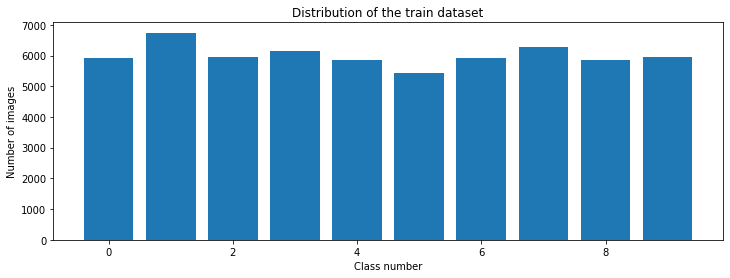

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

### Defining a convolutional network model using the LeNet Architecture
  It consists of the following layers:
1.   Input Layer 
2.   Conv2D (30 layers, 5x5 kernels, relu activation function)
3.   Pooling layer (Max of 2x2 window)
4.   Conv2D (15 layers, 3x3 kernels, relu activation function)
5.   Pooling layer (Max of 2x2 window)
6.   Dense Fully Connected Layer (500 perceptrons, relu activation function)
7.   Output Layer (10 categories, softmax)

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(units=500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=10, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
model = leNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [15]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 77us/sample - loss: 0.2259 - accuracy: 0.9271 - val_loss: 0.0499 - val_accuracy: 0.9833
Epoch 2/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0682 - accuracy: 0.9786 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 3/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0379 - val_accuracy: 0.9897
Epoch 4/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 5/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 6/10
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 7/10
54000/54000 [==============================] -

### Plotting Loss and Accuracy

Text(0.5, 0, 'epoch')

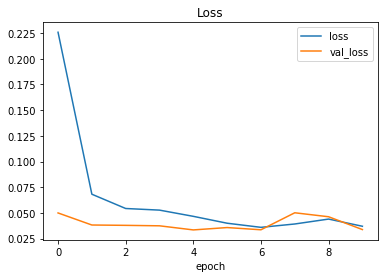

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

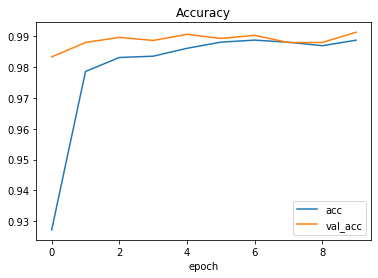

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

### Testing the model on the TEST set

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test score: {score[0] : .3f}%")
print(f"Test accuracy: {score[1] : .3f}%")

Test score:  0.032%
Test accuracy:  0.990%


### Auxiliary functions to get user input

In [0]:
import requests
import PIL.Image
from io import BytesIO
import cv2

def get_reshaped_image(img_url=None, drawing=None):
  if drawing is not None:
     img = PIL.Image.open(BytesIO(b64decode(drawing)))
  else:
    response = requests.get(img_url, stream=True)
    img = PIL.Image.open(response.raw)
  img_array = np.asarray(img)
  resized = cv2.resize(img_array, (28,28))
  try:
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_RGBA2GRAY)
  except:
    gray_scale = resized

  image = cv2.bitwise_not(gray_scale)
  plt.imshow(image, cmap=plt.get_cmap("gray"))
  image = image / 255
  image = image.reshape(1, 28, 28, 1)
  return image

def predict(img_url=None, drawing=None):
  image = get_reshaped_image(img_url, drawing)
  prediction = model.predict_classes(image)
  print('predicted digit: ', str(prediction))

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas style="border: 1px solid red" width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "white";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.lineWidth = %d
ctx.lineCap = "round";
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def draw(filename='drawing.png', w=140, h=140, line_width=30):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  return data.split(',')[1]

### Predicting using user input

predicted digit:  [3]


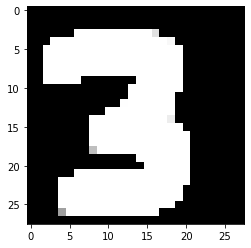

In [20]:
drawing = draw()
predict(drawing=drawing)

### Visualizing Convolutional Outputs

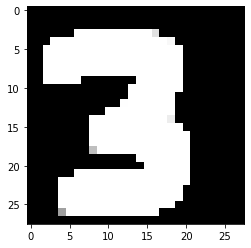

In [21]:
reshaped_image = get_reshaped_image(drawing=drawing)

layer1 = Model(model.layers[0].input, model.layers[0].output)
visual_layer1 = layer1.predict(reshaped_image)

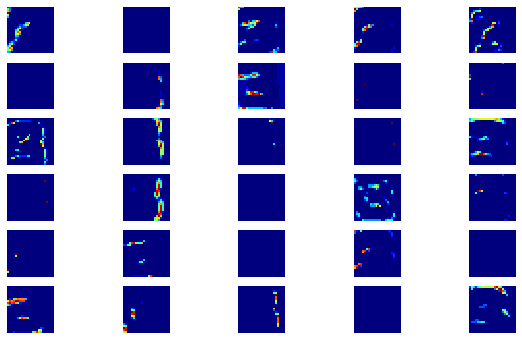

In [22]:
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap("jet"))
  plt.axis('off')

In [0]:
# layer2 = Model(model.layers[2].input, model.layers[2].output)(layer1)
# visual_layer2 = layer2.predict(reshaped_image)
# plt.figure(figsize=(10, 6))
# for i in range(15):
#   plt.subplot(3,5, i+1)
#   plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap("jet"))